In [44]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
pd.set_option('display.max_columns', 999)

In [45]:
df_fanfooty_player_raw = pd.read_csv(r'inputs/fanfooty_raw.csv', low_memory=False)
df_fanfooty_player_raw['Full Name'] = df_fanfooty_player_raw['First Name'] + " " + df_fanfooty_player_raw['Surname']
df_fanfooty_player_raw.tail(3)

,Fanfooty Match ID,Round,Year,Player ID,First Name,Surname,Team,null,DT,SC,null2,null3,null4,Kicks,Handballs,Marks,Tackles,Hitouts,Frees for,Frees against,Goals,Behinds,Not sure,Tag,Tag Notes,Tag 2,Tag 2 Notes,null5,null6,null7,null8,Position,Jumper Number,null9,null10,null11,DT own %,SC own %,AF own %,null12,AF Breakeven,null13,Contested Possessions,Clearances,Clangers,Disposal efficiency,Time on ground,Full Name
88572,http://live.fanfooty.com.au/game/matchcentre.h...,GF,2019,290675,Daniel,Lloyd,WS,6,38,54.0,23,34,52,6,9,1,1,0,0,2,0,1,Full Time,wing,%D and %s... Playing a half forward role,NaN,NaN,0.0,NaN,0.0,NaN,Midfielder,38.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,8.0,2.0,4.0,66.0,76.0,Daniel Lloyd
88573,http://live.fanfooty.com.au/game/matchcentre.h...,GF,2019,271015,Matthew,de Boer,WS,3,31,21.0,16,31,46,6,6,3,0,0,0,3,0,1,Full Time,tagger,%O and %M plus %s... not helped by %F... Doing...,NaN,NaN,0.0,NaN,0.0,NaN,Midfielder,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,6.0,66.0,79.0,Matthew de Boer
88574,http://live.fanfooty.com.au/game/matchcentre.h...,GF,2019,298111,Jeremy,Finlayson,WS,0,8,7.0,8,7,10,1,0,1,1,1,0,1,0,0,Full Time,spearhead,Starting forward,NaN,NaN,0.0,NaN,0.0,NaN,Back,31.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,1.0,1.0,100.0,63.0,Jeremy Finlayson


In [63]:
# Identify when a player is injured
injured_tags = [
    'sore',
    'injured',
    'longterminjured',
    'concussed',
    'heart'
]

def get_injured_status(row):
    if (row['Tag'] in injured_tags or row['Tag 2'] in injured_tags) and row['SC'] < 80:
        return True
    else:
        return False

df_fanfooty_player_raw['Injured'] = df_fanfooty_player_raw.apply(lambda row: get_injured_status(row), axis=1)

,Fanfooty Match ID,Round,Year,Player ID,First Name,Surname,Team,null,DT,SC,null2,null3,null4,Kicks,Handballs,Marks,Tackles,Hitouts,Frees for,Frees against,Goals,Behinds,Not sure,Tag,Tag Notes,Tag 2,Tag 2 Notes,null5,null6,null7,null8,Position,Jumper Number,null9,null10,null11,DT own %,SC own %,AF own %,null12,AF Breakeven,null13,Contested Possessions,Clearances,Clangers,Disposal efficiency,Time on ground,Full Name,Injured
18,http://live.fanfooty.com.au/game/matchcentre.h...,R4,2010,210018,Daniel,Kerr,WC,4,43,65.0,54,34,45,3,7,2,3,0,2,0,0,0,Full Time,injured,Tagged by Welsh... %B among %D... pulled his r...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Daniel Kerr,True
31,http://live.fanfooty.com.au/game/matchcentre.h...,R4,2010,261324,Kyle,Reimers,ES,15,64,66.0,49,47,66,9,4,2,5,0,0,1,1,0,Full Time,sore,Tagged by McGinnity... %O and %T... right ankl...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Kyle Reimers,True
57,http://live.fanfooty.com.au/game/matchcentre.h...,R4,2010,250373,Lachlan,Hansen,NM,8,48,75.0,63,39,48,5,3,6,2,0,1,0,0,0,Full Time,concussed,On White... %D and %T... copped White's knee i...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lachlan Hansen,True
84,http://live.fanfooty.com.au/game/matchcentre.h...,R4,2010,230140,Ben,McGlynn,SY,9,47,55.0,37,42,52,5,6,3,1,0,3,1,1,1,Full Time,sore,%s from %O and %M... Rawlings moved onto him i...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ben McGlynn,True
148,http://live.fanfooty.com.au/game/matchcentre.h...,R4,2010,220005,Luke,Ball,CO,9,62,47.0,79,48,66,4,10,3,5,0,1,0,0,0,Full Time,sore,%B among %D... rolled an ankle in Q1 but back ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Luke Ball,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88451,http://live.fanfooty.com.au/game/matchcentre.h...,PF,2019,270896,Trent,Cotchin,RI,15,64,68.0,85,47,66,7,7,2,6,0,2,1,0,0,Full Time,sore,Knocked shins with Selwood in Q2 leaving him s...,shovel,Leading the inside midfield,0.0,NaN,0.0,NaN,Midfielder,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,8.0,4.0,3.0,85.0,87.0,Trent Cotchin,True
88459,http://live.fanfooty.com.au/game/matchcentre.h...,PF,2019,990827,Jack,Graham,RI,7,41,36.0,56,26,37,5,2,0,5,0,1,0,0,1,Full Time,sore,Dislocated right shoulder when tackling in Q1....,shovel,Rotating in midfield,0.0,NaN,0.0,NaN,Midfielder,34.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,3.0,1.0,2.0,57.0,63.0,Jack Graham,True
88464,http://live.fanfooty.com.au/game/matchcentre.h...,PF,2019,295203,Nathan,Broad,RI,1,16,25.0,22,13,18,1,2,1,2,0,1,1,0,0,Full Time,concussed,KOed when he ran his head into the back of Sho...,job,In defence,0.0,NaN,0.0,NaN,Back,35.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,1.0,100.0,58.0,Nathan Broad,True
88481,http://live.fanfooty.com.au/game/matchcentre.h...,PF,2019,1002220,Esava,Ratugolea,GE,5,48,61.0,44,42,54,4,5,4,2,8,0,1,0,1,Full Time,sore,Off in Q3 with a hand problem... %H... also %P...,spearhead,Playing CHF,0.0,NaN,0.0,NaN,Ruck,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,4.0,0.0,1.0,66.0,84.0,Esava Ratugolea,True


In [64]:
wanted_columns = [
    'Fanfooty Match ID', 'Round', 'Year', 'Player ID', 'Full Name',
    'Team', 'DT', 'SC', 'Kicks', 'Handballs', 'Marks', 
    'Tackles', 'Hitouts', 'Frees for', 'Frees against', 'Goals', 
    'Behinds', 'Tag', 'Tag Notes', 'Tag 2', 'Tag 2 Notes', 'Position', 
    'Jumper Number', 'Contested Possessions', 'Clearances', 'Clangers', 
    'Disposal efficiency', 'Time on ground', 'Injured'
]
df_fanfooty_player_clean = df_fanfooty_player_raw.loc[df_fanfooty_player_raw['Injured'] == False, wanted_columns]
df_fanfooty_player_clean = df_fanfooty_player_clean.dropna(subset=['SC'])
df_fanfooty_player_clean

,Fanfooty Match ID,Round,Year,Player ID,Full Name,Team,DT,SC,Kicks,Handballs,Marks,Tackles,Hitouts,Frees for,Frees against,Goals,Behinds,Tag,Tag Notes,Tag 2,Tag 2 Notes,Position,Jumper Number,Contested Possessions,Clearances,Clangers,Disposal efficiency,Time on ground,Injured
0,http://live.fanfooty.com.au/game/matchcentre.h...,R4,2010,990020,Andrew Embley,WC,111,98.0,20,8,1,6,1,1,0,1,0,gun,Dempsey going with him... %s from %O and %T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1,http://live.fanfooty.com.au/game/matchcentre.h...,R4,2010,230254,Adam Selwood,WC,107,107.0,10,9,4,11,0,3,2,1,0,hot,Tagged by Lonergan... %D and %M with %T plus %s,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2,http://live.fanfooty.com.au/game/matchcentre.h...,R4,2010,200112,Dean Cox,WC,99,118.0,9,10,2,2,30,4,1,1,1,news,%H and %P with %s,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
3,http://live.fanfooty.com.au/game/matchcentre.h...,R4,2010,240016,Beau Waters,WC,98,84.0,15,13,5,6,0,0,4,0,0,news,%P and %M with %F... clangers and FA dampening...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
4,http://live.fanfooty.com.au/game/matchcentre.h...,R4,2010,261911,Brad Ebert,WC,94,109.0,12,9,3,6,0,1,0,1,0,news,Matched up on Winderlich... %D and %T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88570,http://live.fanfooty.com.au/game/matchcentre.h...,GF,2019,261374,Sam J. Reid,WS,47,55.0,5,7,2,3,0,0,0,0,0,utility,%D and %M with %T... Mostly in defence,NaN,NaN,Forward,50.0,5.0,1.0,2.0,66.0,96.0,False
88571,http://live.fanfooty.com.au/game/matchcentre.h...,GF,2019,280762,Shane Mumford,WS,42,62.0,2,8,0,1,15,1,0,0,0,ruck,%O including %B... First ruck,NaN,NaN,Ruck,41.0,8.0,2.0,2.0,70.0,75.0,False
88572,http://live.fanfooty.com.au/game/matchcentre.h...,GF,2019,290675,Daniel Lloyd,WS,38,54.0,6,9,1,1,0,0,2,0,1,wing,%D and %s... Playing a half forward role,NaN,NaN,Midfielder,38.0,8.0,2.0,4.0,66.0,76.0,False
88573,http://live.fanfooty.com.au/game/matchcentre.h...,GF,2019,271015,Matthew de Boer,WS,31,21.0,6,6,3,0,0,0,3,0,1,tagger,%O and %M plus %s... not helped by %F... Doing...,NaN,NaN,Midfielder,24.0,1.0,0.0,6.0,66.0,79.0,False


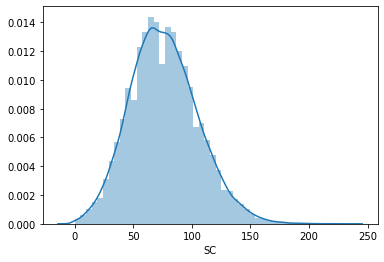

In [65]:
display(sns.distplot(df_fanfooty_player_clean['SC']))

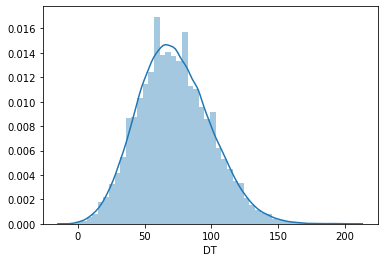

In [66]:
display(sns.distplot(df_fanfooty_player_clean['DT']))

In [67]:
new_df = pd.DataFrame(columns = ['Fanfooty Match ID', 'Team_1', 'Team_1_SC', 'Team_1_DT', 'Team_2', 'Team_2_SC', 'Team_2_DT'])

df_fantasy_summary = pd.pivot_table(df_fanfooty_player_clean, index=['Fanfooty Match ID', 'Team'], values=['SC', 'DT'], aggfunc=np.sum)
df_fantasy_summary = df_fantasy_summary.reset_index()
df_fantasy_summary

,Fanfooty Match ID,Team,DT,SC
0,http://live.fanfooty.com.au/game/matchcentre.h...,ES,1415,1502.0
1,http://live.fanfooty.com.au/game/matchcentre.h...,WC,1527,1674.0
2,http://live.fanfooty.com.au/game/matchcentre.h...,NM,1282,1429.0
3,http://live.fanfooty.com.au/game/matchcentre.h...,SY,1533,1742.0
4,http://live.fanfooty.com.au/game/matchcentre.h...,AD,1430,1513.0
...,...,...,...,...
4015,http://live.fanfooty.com.au/game/matchcentre.h...,RI,1264,1487.0
4016,http://live.fanfooty.com.au/game/matchcentre.h...,CO,1578,1641.0
4017,http://live.fanfooty.com.au/game/matchcentre.h...,WS,1494,1627.0
4018,http://live.fanfooty.com.au/game/matchcentre.h...,RI,1632,1773.0


In [68]:
# Get rolling averages
def rolling_average(df, window):
    return df.rolling(min_periods=1, window=window).mean().shift(1)

rolling_stat_list = ['Kicks', 'Handballs', 'Marks', 
    'Tackles', 'Hitouts', 'Frees for', 'Frees against', 'Goals', 
    'Behinds',  'Contested Possessions', 'Clearances', 'Clangers', 
    'Disposal efficiency', 'Time on ground'
]

for stat in rolling_stat_list:
    df_fanfooty_player_clean["3_rd_rolling_{}".format(stat)] = df_fanfooty_player_clean.groupby('Full Name')[stat].apply(lambda player: rolling_average(player, 3))

df_fanfooty_player_clean['rolling 20 round average'] = df_fanfooty_player_clean.groupby('Full Name')['SC'].apply(lambda player: rolling_average(player, 20))
df_fanfooty_player_clean['rolling 10 round average'] = df_fanfooty_player_clean.groupby('Full Name')['SC'].apply(lambda player: rolling_average(player, 10))
df_fanfooty_player_clean['rolling 5 round average'] = df_fanfooty_player_clean.groupby('Full Name')['SC'].apply(lambda player: rolling_average(player, 5))
df_fanfooty_player_clean['rolling 3 round average'] = df_fanfooty_player_clean.groupby('Full Name')['SC'].apply(lambda player: rolling_average(player, 3))
df_fanfooty_player_clean['previous sc score'] = df_fanfooty_player_clean.groupby('Full Name')['SC'].apply(lambda player: rolling_average(player, 1))
df_fanfooty_player_clean
df_fanfooty_player_clean.loc[df_fanfooty_player_clean['Full Name'] == 'Patrick Cripps', :]

,Fanfooty Match ID,Round,Year,Player ID,Full Name,Team,DT,SC,Kicks,Handballs,Marks,Tackles,Hitouts,Frees for,Frees against,Goals,Behinds,Tag,Tag Notes,Tag 2,Tag 2 Notes,Position,Jumper Number,Contested Possessions,Clearances,Clangers,Disposal efficiency,Time on ground,Injured,3_rd_rolling_Kicks,3_rd_rolling_Handballs,3_rd_rolling_Marks,3_rd_rolling_Tackles,3_rd_rolling_Hitouts,3_rd_rolling_Frees for,3_rd_rolling_Frees against,3_rd_rolling_Goals,3_rd_rolling_Behinds,3_rd_rolling_Contested Possessions,3_rd_rolling_Clearances,3_rd_rolling_Clangers,3_rd_rolling_Disposal efficiency,3_rd_rolling_Time on ground,rolling 20 round average,rolling 10 round average,rolling 5 round average,rolling 3 round average,previous sc score
35213,http://live.fanfooty.com.au/game/matchcentre.h...,R4,2014,990704,Patrick Cripps,CA,61,74.0,5,12,3,5,0,1,3,0,1,rookie,First game... %O including %B... also %T and %...,NaN,NaN,Midfielder,16.0,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35900,http://live.fanfooty.com.au/game/matchcentre.h...,R5,2014,990704,Patrick Cripps,CA,26,21.0,4,3,1,1,0,1,0,0,0,news,%2 Stevens... %P,subbed,Off for Judd in Q3,Midfielder,16.0,NaN,NaN,NaN,NaN,NaN,False,5.000000,12.000000,3.000000,5.000000,0.000000,1.000000,3.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,NaN,74.000000,74.000000,74.000000,74.000000,74.0
42348,http://live.fanfooty.com.au/game/matchcentre.h...,R23,2014,990704,Patrick Cripps,CA,22,23.0,1,2,1,3,0,0,0,0,0,in,Late replacement for Marc Murphy... on after 3...,sub,Started as a sub,Midfielder,16.0,NaN,NaN,NaN,NaN,NaN,False,4.500000,7.500000,2.000000,3.000000,0.000000,1.000000,1.500000,0.000000,0.500000,NaN,NaN,NaN,NaN,NaN,47.500000,47.500000,47.500000,47.500000,21.0
43090,http://live.fanfooty.com.au/game/matchcentre.h...,R1,2015,990704,Patrick Cripps,CA,54,53.0,4,10,3,3,1,0,0,0,0,news,Barely sighted in Q1 but much better in Q2... ...,NaN,NaN,Midfielder,9.0,5.0,1.0,0.0,64.0,76.0,False,3.333333,5.666667,1.666667,3.000000,0.000000,0.666667,1.000000,0.000000,0.333333,NaN,NaN,NaN,NaN,NaN,39.333333,39.333333,39.333333,39.333333,23.0
43915,http://live.fanfooty.com.au/game/matchcentre.h...,R3,2015,990704,Patrick Cripps,CA,81,89.0,10,12,2,4,2,1,0,0,2,news,%O and %M plus %T... %s as well,NaN,NaN,Midfielder,9.0,15.0,5.0,2.0,50.0,75.0,False,3.000000,5.000000,1.666667,2.333333,0.333333,0.333333,0.000000,0.000000,0.000000,5.000000,1.000000,0.000000,64.000000,76.000000,42.750000,42.750000,42.750000,32.333333,53.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86288,http://live.fanfooty.com.au/game/matchcentre.h...,R19,2019,990704,Patrick Cripps,CA,141,152.0,16,23,4,7,0,4,1,1,0,star,%P and %M plus %T... %s as well... umps paid h...,shovel,Playing inside midfield,Midfielder,9.0,24.0,19.0,4.0,66.0,89.0,False,11.000000,18.333333,3.333333,4.333333,0.000000,2.333333,1.333333,1.333333,0.666667,15.333333,7.666667,3.333333,71.000000,90.333333,120.750000,110.400000,118.400000,129.000000,115.0
86911,http://live.fanfooty.com.au/game/matchcentre.h...,R20,2019,990704,Patrick Cripps,CA,75,78.0,8,16,3,3,0,1,1,0,0,shovel,%2 Yeo... %P and %M plus %T... Inside midfielder,NaN,NaN,Midfielder,9.0,14.0,9.0,6.0,62.0,88.0,False,10.333333,19.333333,2.333333,6.000000,0.000000,2.333333,1.666667,0.333333,0.666667,18.000000,11.333333,4.000000,66.000000,88.666667,122.250000,114.600000,125.600000,115.000000,152.0
87322,http://live.fanfooty.com.au/game/matchcentre.h...,R21,2019,990704,Patrick Cripps,CA,126,134.0,15,22,2,7,0,3,0,0,0,gun,%D and %M with %T... aided by %4FF,shovel,Leading from the middle,Midfielder,9.0,21.0,4.0,2.0,54.0,92.0,False,11.000000,19.333333,2.666667,6.000000,0.000000,2.000000,1.666667,0.333333,0.666667,19.000000,12.000000,5.000000,62.666667,88.666667,117.500000,113.100000,123.400000,115.000000,78.0
87442,http://live.fanfooty.com.au/game/matchce

In [69]:
features = [
    '3_rd_rolling_Kicks',
       '3_rd_rolling_Handballs', '3_rd_rolling_Marks', '3_rd_rolling_Tackles',
       '3_rd_rolling_Hitouts', '3_rd_rolling_Frees for',
       '3_rd_rolling_Frees against', '3_rd_rolling_Goals',
       '3_rd_rolling_Behinds', '3_rd_rolling_Contested Possessions',
       '3_rd_rolling_Clearances', '3_rd_rolling_Clangers',
       '3_rd_rolling_Disposal efficiency', '3_rd_rolling_Time on ground',
       'rolling 20 round average', 'rolling 10 round average',
       'rolling 5 round average', 'rolling 3 round average',
       'previous sc score'
]
target = "SC"
df_fanfooty_player_clean = df_fanfooty_player_clean.dropna(subset=features+[target])

X = df_fanfooty_player_clean.loc[:, features]
y = df_fanfooty_player_clean[target]

from sklearn import model_selection

# train/test split
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.30)

In [70]:
from sklearn import ensemble
from sklearn import linear_model
from sklearn import svm

# clr = ensemble.RandomForestClassifier()
# clr = ensemble.GradientBoostingClassifier()
# clr = svm.SVR()
# clr = linear_model.ElasticNet()
clr = linear_model.BayesianRidge()
# clr = linear_model.Lasso()
# clr = linear_model.LinearRegression()
# clr = linear_model.LassoLars()
# clr = linear_model.LogisticRegression()


In [71]:
cv_result = model_selection.cross_validate(estimator=clr
                                , X=X_train
                                , y=y_train
                                , cv=10
                                , scoring=["neg_mean_squared_error"]
                                )
cv_result['test_neg_mean_squared_error'].mean()

-541.0376930697377

In [72]:
clr.fit(X_train, y_train)

pred = clr.predict(X_test)

In [73]:
evaluate = pd.DataFrame({
    "actual": y_test,
    "predicted": pred,
    "diff": y_test - pred
})

# evaluate
df_predicted_scores = pd.merge(df_fanfooty_player_clean, evaluate, left_index=True, right_index=True)
df_predicted_scores
# df_predicted_scores.to_csv('thingy.csv')

,Fanfooty Match ID,Round,Year,Player ID,Full Name,Team,DT,SC,Kicks,Handballs,Marks,Tackles,Hitouts,Frees for,Frees against,Goals,Behinds,Tag,Tag Notes,Tag 2,Tag 2 Notes,Position,Jumper Number,Contested Possessions,Clearances,Clangers,Disposal efficiency,Time on ground,Injured,3_rd_rolling_Kicks,3_rd_rolling_Handballs,3_rd_rolling_Marks,3_rd_rolling_Tackles,3_rd_rolling_Hitouts,3_rd_rolling_Frees for,3_rd_rolling_Frees against,3_rd_rolling_Goals,3_rd_rolling_Behinds,3_rd_rolling_Contested Possessions,3_rd_rolling_Clearances,3_rd_rolling_Clangers,3_rd_rolling_Disposal efficiency,3_rd_rolling_Time on ground,rolling 20 round average,rolling 10 round average,rolling 5 round average,rolling 3 round average,previous sc score,actual,predicted,diff
42856,http://live.fanfooty.com.au/game/matchcentre.h...,SF,2014,250321,Joel Selwood,GE,108,148.0,14,10,5,8,0,5,2,0,0,gun,%2 Swallow... yet another game in 2014 where h...,NaN,NaN,Midfielder,14.0,16.0,11.0,2.0,79.0,86.0,False,12.333333,15.666667,4.333333,6.333333,0.000000,2.666667,0.666667,2.000000,0.333333,16.000000,9.000000,4.000000,71.000000,83.000000,118.80,131.6,131.0,139.000000,151.0,148.0,115.515902,32.484098
42857,http://live.fanfooty.com.au/game/matchcentre.h...,SF,2014,281065,Mitch Duncan,GE,92,113.0,11,9,5,5,0,0,0,1,0,news,Started on a HFF on McDonald... %P and %M plus...,NaN,NaN,Midfielder,22.0,8.0,2.0,1.0,80.0,90.0,False,11.333333,20.000000,6.333333,3.000000,0.333333,0.333333,1.000000,0.333333,0.333333,7.000000,3.000000,1.000000,86.000000,90.000000,98.65,100.9,98.6,115.333333,77.0,113.0,96.776210,16.223790
42859,http://live.fanfooty.com.au/game/matchcentre.h...,SF,2014,296733,Mark Blicavs,GE,79,90.0,4,5,3,6,22,2,2,1,0,news,Big job as lone ruck... %H... also %P and %M p...,NaN,NaN,Ruck,46.0,5.0,2.0,3.0,66.0,87.0,False,5.333333,11.000000,2.666667,3.333333,12.666667,0.333333,0.000000,0.333333,0.000000,10.000000,2.000000,0.000000,75.000000,96.000000,72.75,83.2,91.6,81.000000,103.0,90.0,79.591947,10.408053
42861,http://live.fanfooty.com.au/game/matchcentre.h...,SF,2014,220007,Jimmy Bartel,GE,64,66.0,10,4,4,3,0,1,2,1,1,news,%O with %k by foot... also %M and %T... and ki...,NaN,NaN,Back Midfielder,3.0,4.0,0.0,5.0,64.0,94.0,False,13.000000,10.000000,5.333333,4.000000,1.000000,1.333333,0.333333,1.333333,0.000000,9.000000,2.000000,2.000000,65.000000,95.000000,102.20,94.3,100.2,103.666667,97.0,66.0,93.646385,-27.646385
42862,http://live.fanfooty.com.au/game/matchcentre.h...,SF,2014,291550,Joshua Walker,GE,63,62.0,5,2,4,3,7,0,2,3,1,news,MacMillan on him... %s from %P and %M plus %T,NaN,NaN,Forward,34.0,3.0,0.0,4.0,57.0,80.0,False,3.666667,5.000000,2.666667,2.666667,7.666667,0.666667,1.000000,0.666667,1.000000,6.000000,2.000000,2.000000,66.000000,68.000000,48.50,47.9,55.6,58.333333,45.0,62.0,55.494480,6.505520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88555,http://live.fanfooty.com.au/game/matchcentre.h...,GF,2019,998172,Tim Taranto,WS,117,143.0,14,16,5,7,0,3,1,0,0,hot,%D and %M with %T... helped out by %4FF,shovel,Starting in midfield,Midfielder,14.0,15.0,5.0,4.0,63.0,80.0,False,17.666667,6.000000,4.666667,5.333333,0.000000,0.666667,1.000000,0.333333,0.333333,10.000000,6.000000,4.666667,58.666667,77.666667,103.55,98.4,101.2,100.333333,109.0,143.0,100.424819,42.575181
88561,http://live.fanfooty.com.au/game/matchcentre.h...,GF,2019,294508,Aidan Corr,WS,67,76.0,15,3,4,1,0,0,0,0,0,job,%P with %k by foot... also %M... In defence on...,NaN,NaN,Back,35.0,1.0,0.0,2.0,83.0,77.0,False,11.000000,3.666667,3.666667,2.000000,0.000000,0.666667,1.666667,0.000000,0.000000,2.000000,0.000000,2.333333,89.000000,80.000000,54.40,56.7,55.0,59.333333,59.0,76.0,60.640429,15.359571
88563,http://live.fanfooty.com.au/game/matchcentre.h...,GF,2019,280804,Phil Davis,WS,65,73.0,11,4,9,0,0,0,1,0,0,job,%P with %k by foot... also %M... At FB on Riew...,NaN,NaN,B

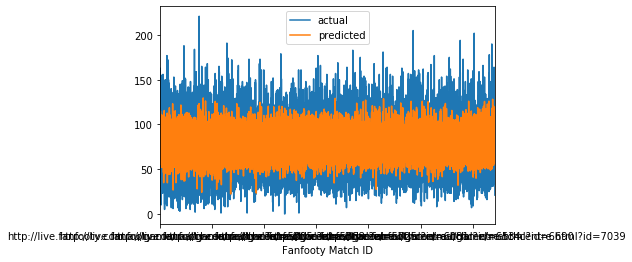

In [74]:
df_all_players_predicted = df_predicted_scores[['Fanfooty Match ID', 'actual', 'predicted']]
df_all_players_predicted = df_all_players_predicted.set_index('Fanfooty Match ID')
lines = df_all_players_predicted.plot.line()

,actual,predicted
Fanfooty Match ID,,
http://live.fanfooty.com.au/game/matchcentre.html?id=5229,172.0,60.568525
http://live.fanfooty.com.au/game/matchcentre.html?id=5264,68.0,83.912956
http://live.fanfooty.com.au/game/matchcentre.html?id=5283,99.0,84.089145
http://live.fanfooty.com.au/game/matchcentre.html?id=5308,82.0,94.975603
http://live.fanfooty.com.au/game/matchcentre.html?id=5355,103.0,89.479410
http://live.fanfooty.com.au/game/matchcentre.html?id=5601,101.0,95.166911
http://live.fanfooty.com.au/game/matchcentre.html?id=5618,101.0,98.807870
http://live.fanfooty.com.au/game/matchcentre.html?id=5632,96.0,98.418279
http://live.fanfooty.com.au/game/matchcentre.html?id=5656,127.0,100.543240


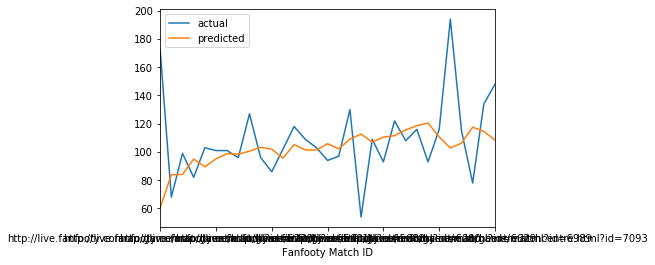

In [75]:
df_player = df_predicted_scores.loc[df_predicted_scores['Full Name'] == 'Patrick Cripps']
df_player = df_player[['Fanfooty Match ID', 'actual', 'predicted']]
df_player = df_player.set_index('Fanfooty Match ID')
display(df_player)
lines = df_player.plot.line()

In [76]:
# Is it a better predictor than simply 10, 5, 3, or 1 round average? YES

from sklearn.metrics import mean_squared_error 

display(mean_squared_error(df_predicted_scores['rolling 20 round average'], df_predicted_scores['actual']))
display(mean_squared_error(df_predicted_scores['rolling 10 round average'], df_predicted_scores['actual']))
display(mean_squared_error(df_predicted_scores['rolling 5 round average'], df_predicted_scores['actual']))
display(mean_squared_error(df_predicted_scores['rolling 3 round average'], df_predicted_scores['actual']))
display(mean_squared_error(df_predicted_scores['previous sc score'], df_predicted_scores['actual']))
display(mean_squared_error(df_predicted_scores['predicted'], df_predicted_scores['actual']))

570.5221499046175

576.9756497788911

610.2478962110014

661.22230218626

961.1426904224695

548.8589424858213